## Data Story Telling

In [3]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# Load the data into DataFrames
df_train = pd.read_csv('train_users_2.csv')
df_test = pd.read_csv('test_users.csv')
sessions = pd.read_csv('sessions.csv')
usergrp = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')

In [5]:
usergrp = pd.read_csv('age_gender_bkts.csv')

In [6]:
#Convert 100+ into a bin.
usergrp['age_bucket'] = usergrp['age_bucket'].apply(lambda x: '100-104' if x == '100+' else x)
#Define mean_age feature
usergrp['mean_age'] = usergrp['age_bucket'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)
usergrp = usergrp.drop('age_bucket', axis=1)

In [7]:
countries = pd.read_csv('countries.csv')

In [8]:
sessions = pd.read_csv('sessions.csv')

In [9]:
print("We have", df_train.shape[0], "users in the training set and", 
      df_test.shape[0], "in the test set.")
print("In total we have", df_train.shape[0] + df_test.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [15]:
users = pd.concat((df_train, df_test), axis=0, ignore_index=True)

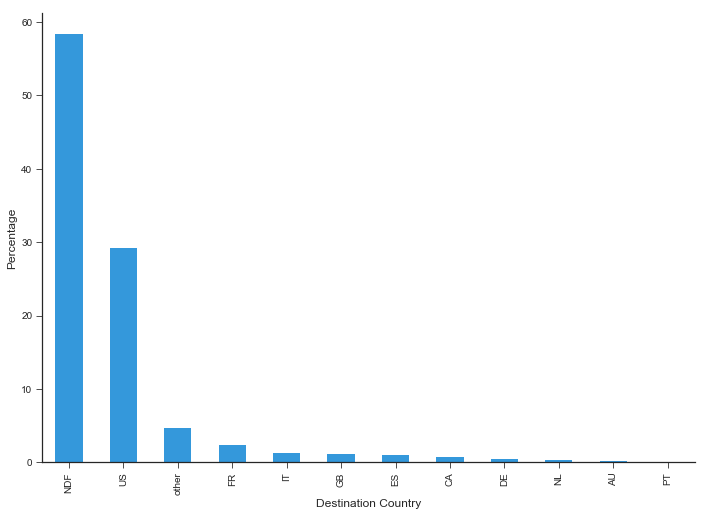

In [11]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = df_train.country_destination.value_counts() / df_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

1.  57% of users in Train data set did not travel anywhere

2.  28 % of users travelled in their home country i.e. U.S

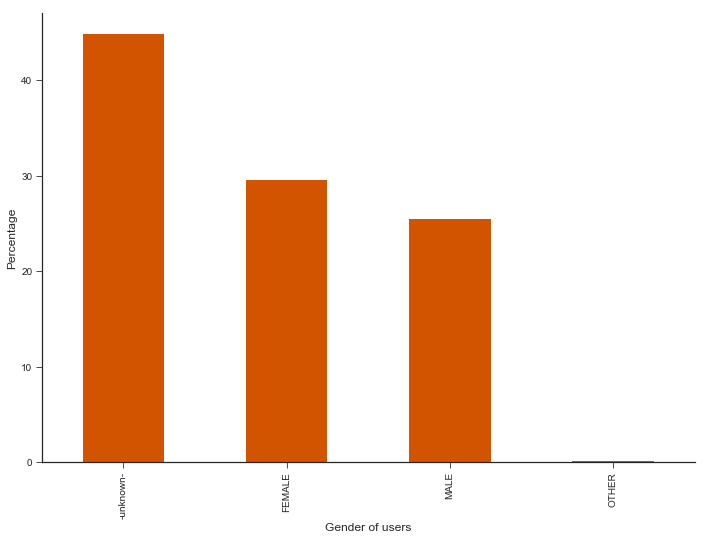

In [12]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
gender_percentage = df_train.gender.value_counts() / df_train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D35400')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

1. 45 % of user's gender information is not present
2. There is less difference between Female and Male users

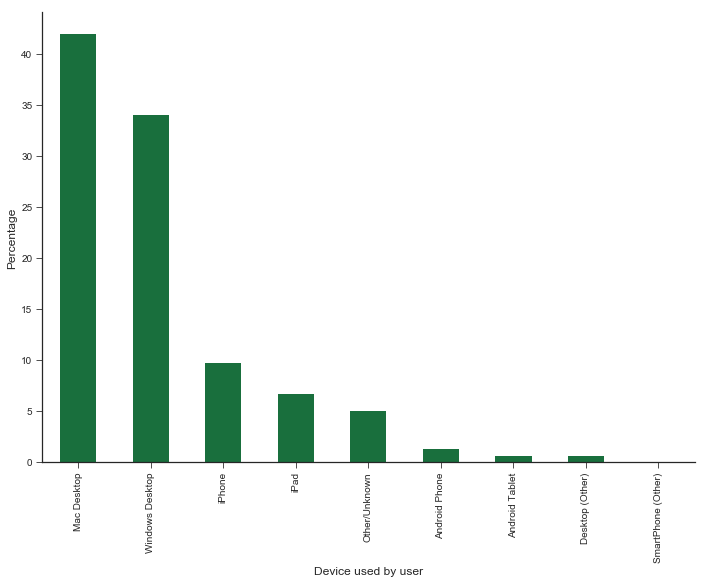

In [13]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = df_train.first_device_type.value_counts() / df_train.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

1.  58% users are using Apple products
2. Out of 71,719 users who travelled atleast once,31660 users are apple users [ 44.15% ] which implies Mac users are booking more frequently

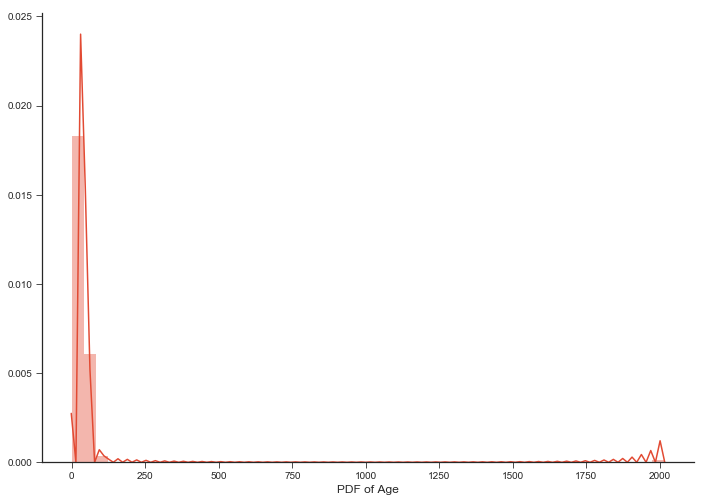

In [16]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(users.age.dropna())
plt.xlabel('PDF of Age')
sns.despine()

Some age values are incorrect, close to 2000 years old.

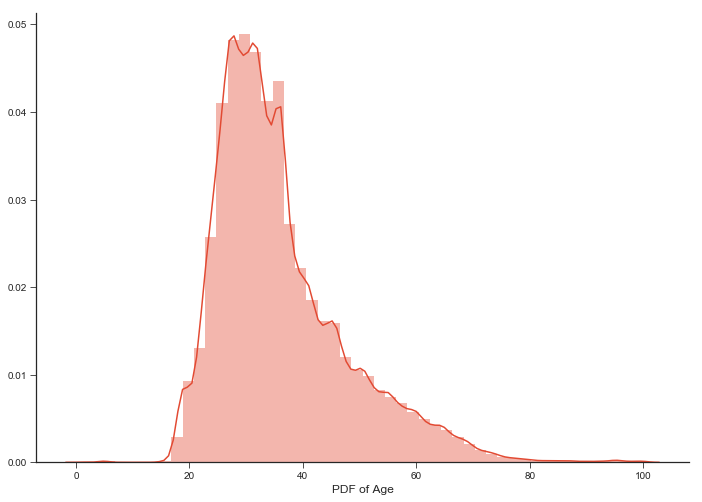

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
users['age']=users['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(users.age.dropna())
plt.xlabel('PDF of Age')
sns.despine()

1.  Majority of the users are between age 25 and 40 years . [ 72% ]
2.  There are some age values which are less than 18 years [ 0.006% ]

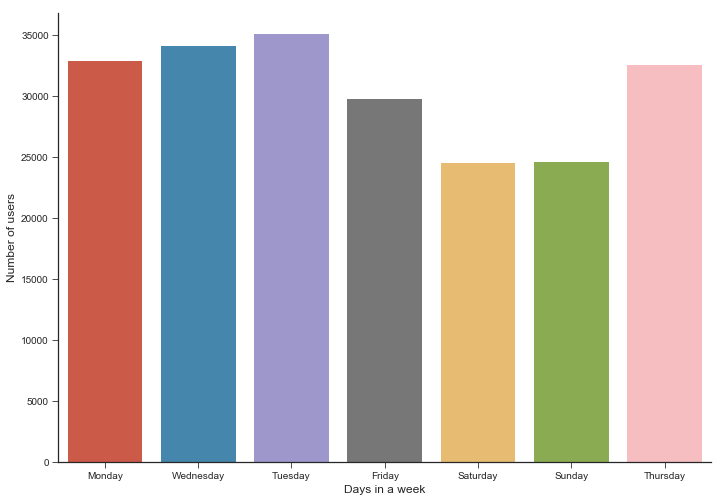

In [19]:
df_train['date_account_created_new'] = pd.to_datetime(df_train['date_account_created'])
df_train['date_first_active_new'] = pd.to_datetime((df_train.timestamp_first_active // 1000000), format='%Y%m%d')
df_train['date_account_created_day'] = df_train.date_account_created_new.dt.weekday_name
df_train['date_account_created_month'] = df_train.date_account_created_new.dt.month
df_train['date_account_created_year'] = df_train.date_account_created_new.dt.year
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_train[df_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='date_account_created_day',data=df_train)
plt.xlabel('Days in a week')
plt.ylabel('Number of users')
sns.despine()

# order from Monday - Friday, Saturday - Sunday

User activity is low on saturday and sunday, bookings on Saturday and Sunday is lower than the others during the week

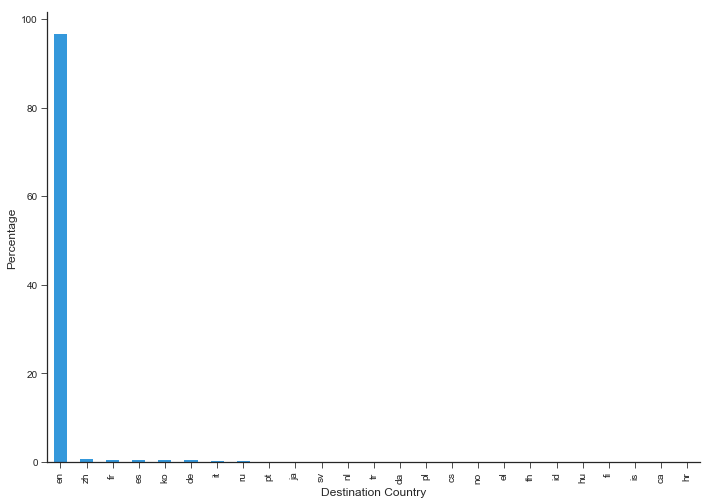

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = df_train.language.value_counts() / df_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

Majority of the user's language preference destination country is English (96.67%) . 

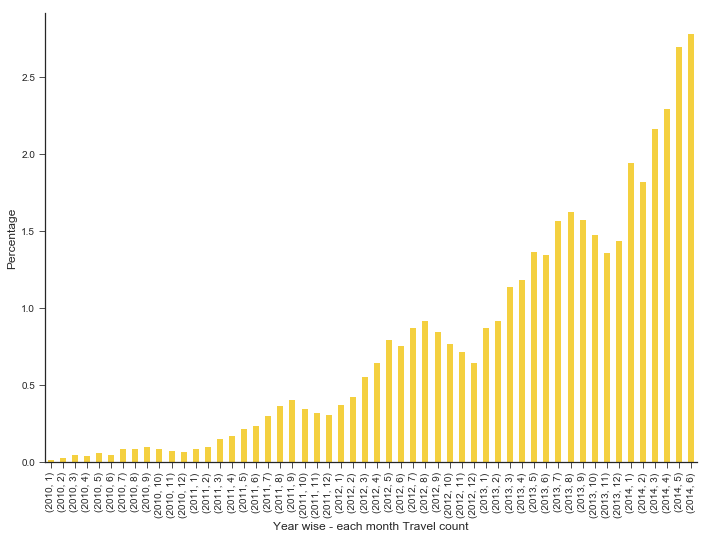

In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_train[df_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
df_train['booked'] = df_train.country_destination.apply(lambda x:1 if x!='NDF' else 0 )
destination_percentage = df_train.groupby(['date_account_created_year','date_account_created_month']).booked.sum() / df_train.shape[0] * 100
destination_percentage.plot(kind='bar',color="#F4D03F")
plt.xlabel('Year wise - each month Travel count')
plt.ylabel('Percentage')
sns.despine()

We can see from the graph that each year has similar trend that in July, August, September, the chance of booking is higher than the rest of the year. 

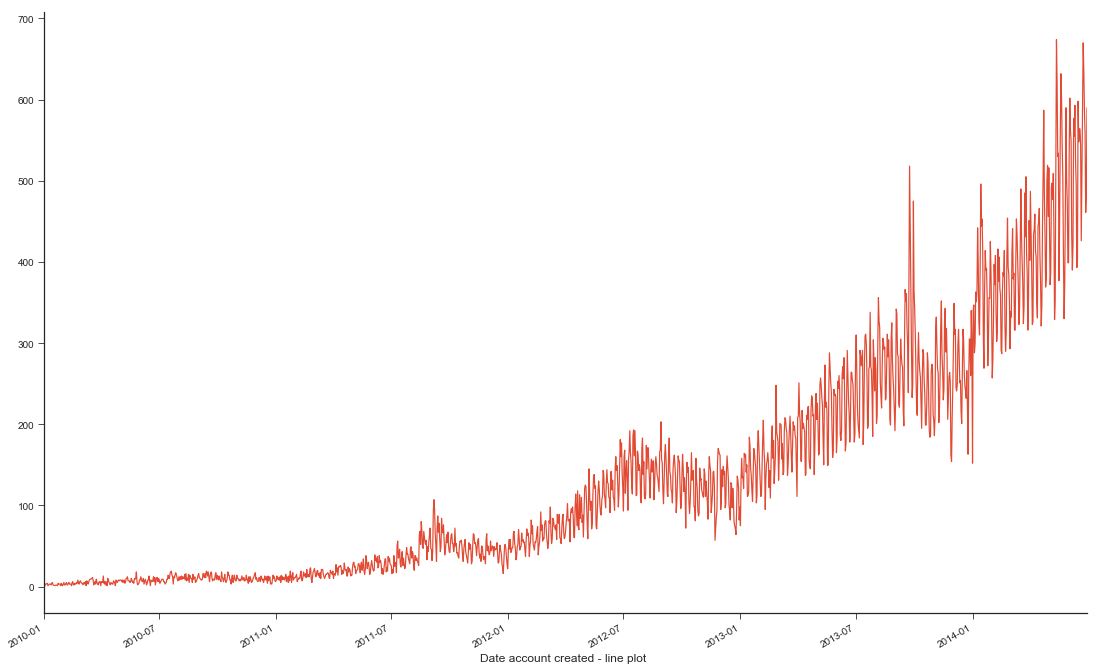

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 12.27)
df_train.date_account_created_new.value_counts().plot(kind='line', linewidth=1.2)
plt.xlabel('Date account created - line plot ')
sns.despine()

1. Every year  beween September and October there is increase in Activity of users on Airbnb .
2. Basic study on this lead to interesting phenomena that users are trying to book for Superbowl , Labor day.

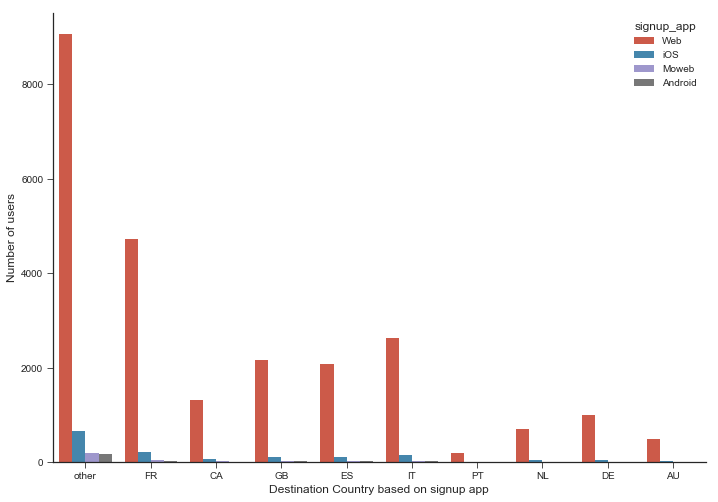

In [22]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_train[df_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

1. Users with signup app 'Web' outnumbered other signup app ( Moweb , iOS , Android) in every country. [ 85% ]
2. Android is the least used signup app [ 0.02% ]

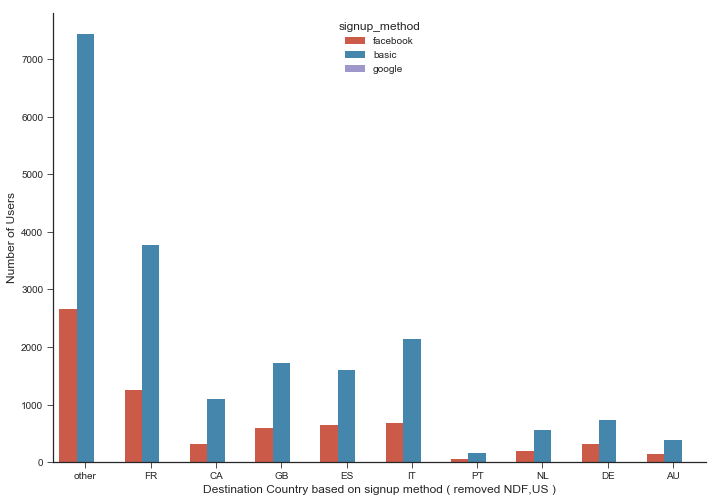

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_train[df_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
sns.despine()

1.  There are less signups (0.03%, almost negligible) happening by google signup compared to facebook,basic signup
2.  Basic signup count is almost 2.5 times facebook signup count

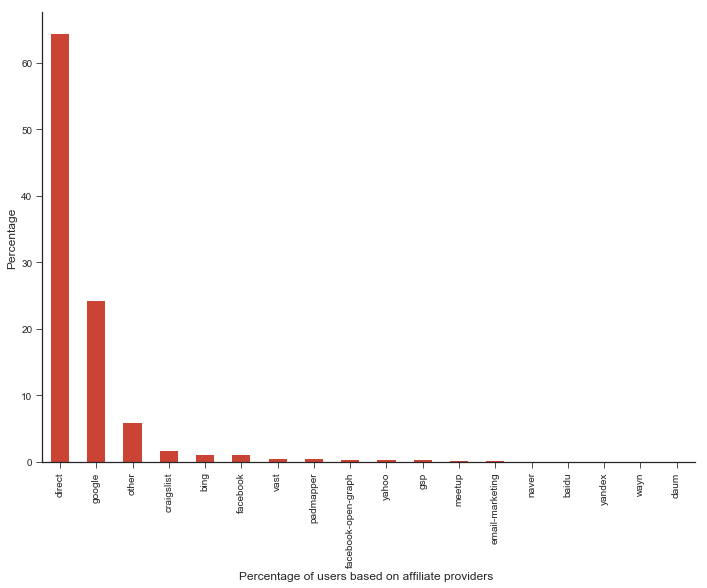

In [25]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = df_train.affiliate_provider.value_counts() / df_train.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
sns.despine()

In previous plot we have observed that percentage of users signing up with google are 0.03% , but in this plot we observe that most of users are coming from google (22%)